In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('Wholesale+Customers+Data.csv')

In [7]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.0+ KB


From this we can see that Channel and Region are the only categorical data, rest all columns are numerical. There is 440 rows with 9 attributes.

In [9]:
data.isnull().any()

Buyer/Spender       False
Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicatessen        False
dtype: bool

Also, there is no missing values in the dataset.

In [10]:
data.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
Retail = data[data['Channel']=='Retail'].describe()

In [15]:
Hotel = data[data['Channel']=='Hotel'].describe()

In [24]:
RetailSpendings=(np.array(Retail.loc['count'])*np.array(Retail.loc['mean'])).sum()

In [25]:
RetailSpendings

6645917.0

In [26]:
HotelSpendings=(np.array(Hotel.loc['count'])*np.array(Hotel.loc['mean'])).sum()

In [27]:
HotelSpendings

8070603.0

In [29]:
otherReg=data[data['Region']=='Other'].describe()
lisbonReg=data[data['Region']=='Lisbon'].describe()
oportoReg=data[data['Region']=='Oporto'].describe()

In [30]:
otherRegSp=(np.array(otherReg.loc['count'])*np.array(otherReg.loc['mean'])).sum()
lisbonRegSp=(np.array(lisbonReg.loc['count'])*np.array(lisbonReg.loc['mean'])).sum()
oportoRegSp=(np.array(oportoReg.loc['count'])*np.array(oportoReg.loc['mean'])).sum()

In [35]:
print("Lisbon spent {} \nOporto spent {} \nOther spent {} ".format(lisbonRegSp,oportoRegSp,otherRegSp))

Lisbon spent 2404908.0 
Oporto spent 1569987.0 
Other spent 10741625.0 


In [34]:
print(f"Hotel Spendings: {HotelSpendings} \nRetail Spendings: {RetailSpendings}")

Hotel Spendings: 8070603.0 
Retail Spendings: 6645917.0


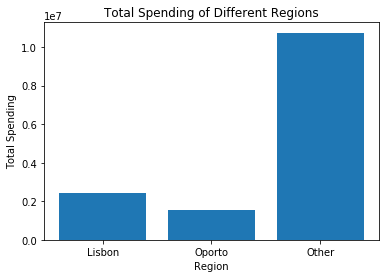

In [32]:
plt.bar(['Lisbon','Oporto','Other'], [lisbonRegSp,oportoRegSp,otherRegSp])
plt.xlabel("Region")
plt.ylabel("Total Spending")
plt.title("Total Spending of Different Regions")
plt.show()

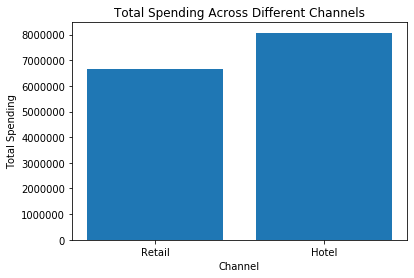

In [33]:
plt.bar(['Retail', 'Hotel'], [RetailSpendings,HotelSpendings])
plt.xlabel("Channel")
plt.ylabel("Total Spending")
plt.title("Total Spending Across Different Channels")
plt.show()

In [53]:
print(f"Lisbon spent {lisbonRegSp} \nOporto spend {oportoRegSp} \nOther spent {otherRegSp} ")

Lisbon spent 2404908.0 
Oporto spend 1569987.0 
Other spent 10741625.0 


In [76]:
pd.pivot_table(data,values=data.columns[3:], index=['Region'], aggfunc=np.sum )

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,104327,204136,854833,231026,570037,422454
Oporto,54506,173311,464721,190132,433274,239144
Other,512110,890410,3960577,930492,2495251,1888759


In [36]:
channel=pd.pivot_table(data,values=data.columns[3:], index=['Channel'], aggfunc=np.sum )

In [65]:
channel.loc['Retail']

Delicatessen         248988
Detergents_Paper    1032270
Fresh               1264414
Frozen               234671
Grocery             2317845
Milk                1521743
Name: Retail, dtype: int64

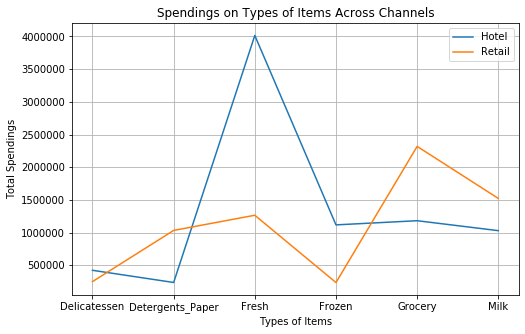

In [64]:
#plt.bar(channel.columns[1:])
plt.figure(figsize=(8,5))
line_chart1 = plt.plot(channel.columns, channel.loc['Hotel'])
line_chart2 = plt.plot(channel.columns, channel.loc['Retail'])
plt.title('Spendings on Types of Items Across Channels')

plt.xlabel('Types of Items')
plt.ylabel('Total Spendings')
plt.legend(['Hotel', 'Retail'], loc=1)
plt.grid()
plt.show()

In [60]:
Region=pd.pivot_table(data,values=data.columns[3:], index=['Region'], aggfunc=np.sum )

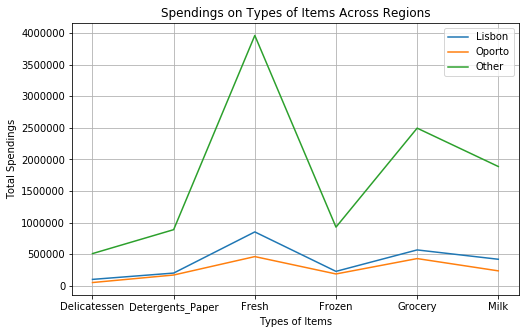

In [63]:
#plt.bar(channel.columns[1:])
plt.figure(figsize=(8,5))
line_chart1 = plt.plot(Region.columns, Region.loc['Lisbon'])
line_chart2 = plt.plot(Region.columns, Region.loc['Oporto'])
line_chart3 = plt.plot(Region.columns, Region.loc['Other'])
plt.title('Spendings on Types of Items Across Regions')

plt.xlabel('Types of Items')
plt.ylabel('Total Spendings')
plt.legend(['Lisbon','Oporto','Other'], loc=1)
plt.grid()
plt.show()

In [78]:
pd.pivot_table(data,values=data.columns[3:], index=['Channel'], aggfunc=[min, max, np.mean])

min                                                     max  \
        Delicatessen Detergents_Paper Fresh Frozen Grocery Milk Delicatessen   
Channel                                                                        
Hotel              3                3     3     25       3   55        47943   
Retail             3              332    18     33    2743  928        16523   

                                                               mean  \
        Detergents_Paper   Fresh Frozen Grocery   Milk Delicatessen   
Channel                                                               
Hotel               6907  112151  60869   21042  43950  1415.956376   
Retail             40827   44466  11559   92780  73498  1753.436620   

                                                                   \
        Detergents_Paper         Fresh       Frozen       Grocery   
Channel                                                             
Hotel         790.560403  13475.560403  3748.251678   3962.137584   
Retail       7269.507042   8904.323944  1652.612676  16322.852113   

                       
                 Milk  
Channel                
Hotel     3451.724832  
Retail   10716.500000

So many outliers, could mean that there are lot of extreme values, so Fresh is not consistent.

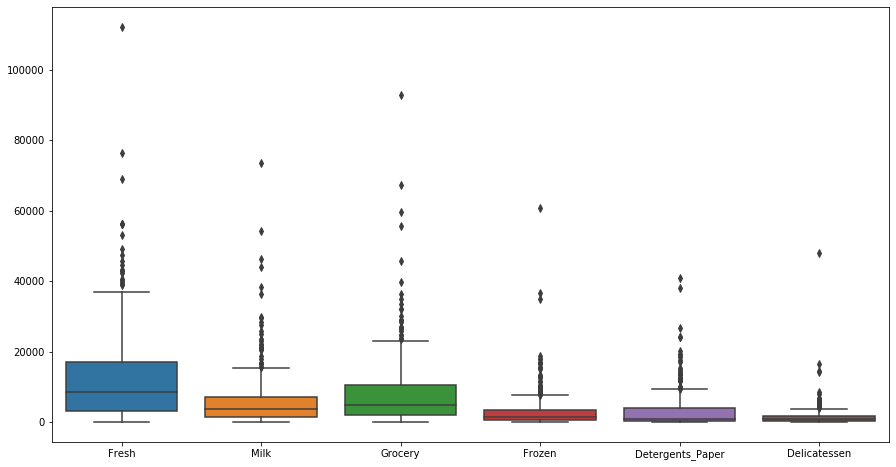

In [95]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data[data.columns[1:]])

Firstly, there are no missing values in the data, so the whole data is consistent in terms of missing values.
On analysis of the box plots, it is evident that there are a lot of outliers across all types of spending.

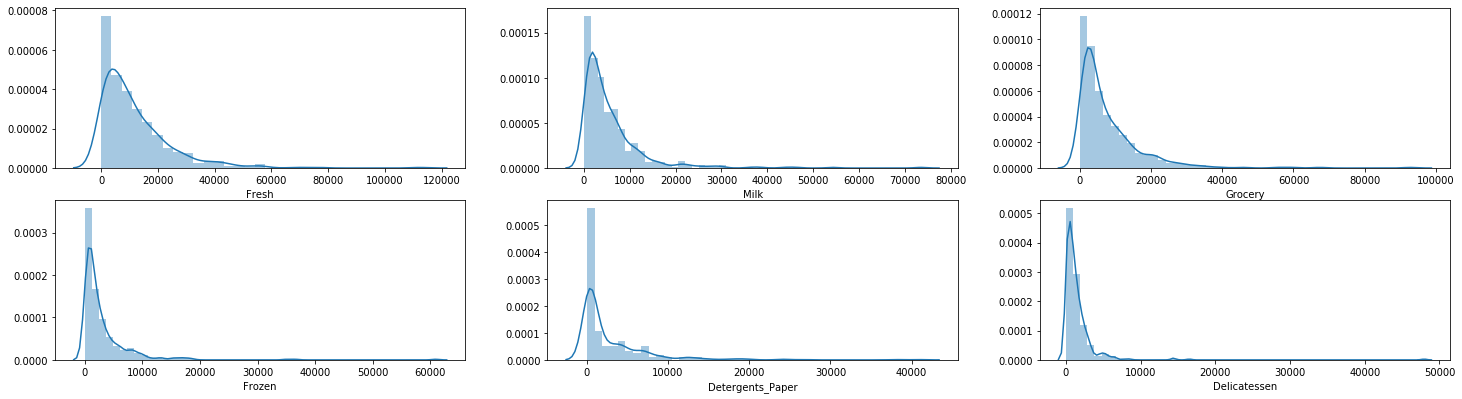

In [106]:
plt.figure(figsize=(25,10))
for i, column in enumerate(data.columns[3:], 1):
    plt.subplot(3,3,i)
    sns.distplot(data[column])

Try to explain consistency with these